# Text Analysis of COVID-19 Related Tweets

Analyze hydrated Twitter IDs that contain a hashtag related to the novel coronavirus (outlined [here](https://github.com/echen102/COVID-19-TweetIDs)) to analyze the text and types of speech that people tweeted about at different points over the past month (March 2020).

## import packages

In [1]:
# import packages for data analysis
import pandas as pd
import numpy as np

# import packages for text analysis/manipulation
import nltk
# separate strings of text into individual words
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TweetTokenizer
# remove/identify stop words
from nltk.corpus import stopwords
# identify roots of words 
from nltk.stem import PorterStemmer
# get frequency of words
from nltk.probability import FreqDist

# for wordcloud image
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## import data 

In [2]:
# import twitter data from march 4 at 16UTC
df_tweets_march4 = pd.read_csv("coronavirus-tweet-id-2020-03-04-16.csv", low_memory = False)

# import twitter data from april 1 at 16UTC
df_tweets_april1 = pd.read_csv("coronavirus-tweet-id-2020-04-01-16.csv")

/Users/melanieshimano/opt/anaconda3/envs/business-analytics/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# preview data
df_tweets_march4.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235633993568256,NaN,NaN,NaN,...,44,110,0,NaN,𝓂𝒾𝓇𝒶,fzmira1,7964,NaN,NaN,False
1,NaN,Wed Mar 04 16:08:20 +0000 2020,NaN,NaN,NaN,0,1235235639391670272,NaN,NaN,NaN,...,1487,2660,9,日本 北関東,ともたま。,tomotamachiko,133962,NaN,NaN,False
2,NaN,Wed Mar 04 16:08:20 +0000 2020,NaN,NaN,NaN,1,1235235639462891522,NaN,NaN,NaN,...,132,421,0,"Piauí, Brasil",Thiago Marques,thiagmarqis,187,NaN,https://instagram.com/thiagmarqs?igshid=1p0213...,False
3,NaN,Wed Mar 04 16:08:19 +0000 2020,CoronaVirus,NaN,NaN,0,1235235635633496064,NaN,NaN,NaN,...,16410,146,29,"Patna, Bihar, India",PIB In Bihar #stayhome#staysafe,PIB_Patna,12846,NaN,http://pib.nic.in,True
4,NaN,Wed Mar 04 16:08:19 +0000 2020,coronavirus,NaN,NaN,0,1235235635998253056,NaN,NaN,NaN,...,212,462,0,"Ibrahimpatan, India",Karthik Reddy (Tillu),KarthikreddyTRS,655,NaN,NaN,False


In [4]:
# what columns are in our df?
df_tweets_march4.columns.tolist()

['coordinates',
 'created_at',
 'hashtags',
 'media',
 'urls',
 'favorite_count',
 'id',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'lang',
 'place',
 'possibly_sensitive',
 'retweet_count',
 'reweet_id',
 'retweet_screen_name',
 'source',
 'text',
 'tweet_url',
 'user_created_at',
 'user_screen_name',
 'user_default_profile_image',
 'user_description',
 'user_favourites_count',
 'user_followers_count',
 'user_friends_count',
 'user_listed_count',
 'user_location',
 'user_name',
 'user_screen_name.1',
 'user_statuses_count',
 'user_time_zone',
 'user_urls',
 'user_verified']

In [5]:
# what do each of the columns contain?
df_tweets_march4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176768 entries, 0 to 176767
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   coordinates                 35 non-null      object 
 1   created_at                  176768 non-null  object 
 2   hashtags                    36082 non-null   object 
 3   media                       15227 non-null   object 
 4   urls                        33664 non-null   object 
 5   favorite_count              176768 non-null  int64  
 6   id                          176768 non-null  int64  
 7   in_reply_to_screen_name     10943 non-null   object 
 8   in_reply_to_status_id       9968 non-null    float64
 9   in_reply_to_user_id         10945 non-null   float64
 10  lang                        176768 non-null  object 
 11  place                       1242 non-null    object 
 12  possibly_sensitive          44645 non-null   object 
 13  retweet_count 

In [6]:
# make dataframe that only includes english words
df_en_march4 = df_tweets_march4[df_tweets_march4["lang"] == "en"]
df_en_april1 = df_tweets_april1[df_tweets_april1["lang"] == "en"]

## Make a Wordcloud for March 4, 2020

In [7]:
# make march 4 column into a list
march4_list = df_en_march4["text"].tolist()

In [8]:
# make one large string from text column to make into a wordcloud
text_march4 = (" ").join(march4_list)

In [9]:
# look at text from all english tweets
#text_march4

In [10]:
# Create and generate a word cloud image:
wordcloud_march4 = WordCloud().generate(text_march4)

(-0.5, 399.5, 199.5, -0.5)

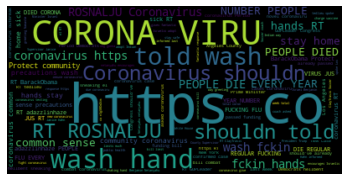

In [11]:
# show the word cloud using matplotlib 
# bilinear helps clarify the text
plt.imshow(wordcloud_march4, interpolation='bilinear')
# remove the axes from the plot since thse dont help us with a wordcloud
plt.axis("off")

(-0.5, 999.5, 999.5, -0.5)

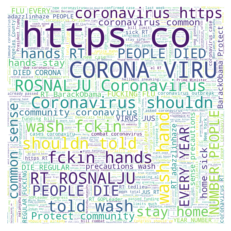

In [12]:
# edit wordcloud image
wordcloud_march4 = WordCloud(max_words=5000, 
                             height = 1000,
                             width = 1000,
                             background_color="white").generate(text_march4)
# create a plot
plt.figure()
# add wordcloud data to plot
plt.imshow(wordcloud_march4, interpolation="bilinear")
# remove axes from plot
plt.axis("off")

In [13]:
# save word cloud to image
wordcloud_march4.to_file("covid19-wordcloud-march4-initial.png")

## Make a Wordcloud for April 1, 2020

In [14]:
# make march 4 column into a list
april1_list = df_en_april1["text"].tolist()

In [15]:
# make one large string from text column to make into a wordcloud
text_april1=(" ").join(april1_list)

(-0.5, 999.5, 999.5, -0.5)

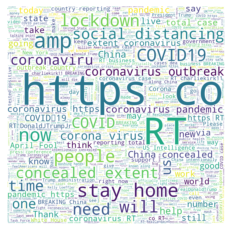

In [16]:
# edit wordcloud image
wordcloud_april1 = WordCloud(max_words=5000, 
                             height = 1000,
                             width = 1000,
                             background_color="white").generate(text_april1)
plt.figure()
plt.imshow(wordcloud_april1, interpolation="bilinear")
plt.axis("off")

In [17]:
# save word cloud to image
wordcloud_april1.to_file("covid19-wordcloud-april1-initial.png")

## Text Manipulation 

### Parsing Out Individual Words (Tokenizing)

### Make all text lowerase 

In [18]:
df_en_march4["text"]

4         RT @KonathamDileep: Request friends from media...
5         RT @tedlieu: If true, the @StateDept officials...
7         RT @adazzlinhaze: MORE PEOPLE DIE FROM THE REG...
9                RT @katalog: This thread needs to go viral
10        RT @JoanofAmerica: @realDonaldTrump @wef Q Pro...
                                ...                        
176763    🔥CORONA BREAKING NEWS\ncurrent cases for mobil...
176764        #COVIDー19 Remember 🙌🏼 https://t.co/uqSQkzKdBY
176765    RT @ippcnews: 📢 Considering the travel restric...
176766    RT @HKORB: At a time when the Supreme Court is...
176767    @HeartDorktor Add Stethoscopes! Rene' Laennec ...
Name: text, Length: 156997, dtype: object

In [19]:
# make column of lowercase text
df_en_march4["lcase_text"] = df_en_march4["text"].str.lower()

<ipython-input-19-dc6cc380f09b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_march4["lcase_text"] = df_en_march4["text"].str.lower()


In [20]:
df_en_march4.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,lcase_text
4,NaN,Wed Mar 04 16:08:19 +0000 2020,coronavirus,NaN,NaN,0,1235235635998253056,NaN,NaN,NaN,...,462,0,"Ibrahimpatan, India",Karthik Reddy (Tillu),KarthikreddyTRS,655,NaN,NaN,False,rt @konathamdileep: request friends from media...
5,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235634060681223,NaN,NaN,NaN,...,1418,3,Abington PA,JT. #SOSAmericaNow 🆘,Volksnurse,49661,NaN,NaN,False,"rt @tedlieu: if true, the @statedept officials..."
7,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235633507037185,NaN,NaN,NaN,...,293,1,Chicago,laura,mezz21l,7866,NaN,NaN,False,rt @adazzlinhaze: more people die from the reg...
9,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235633607643138,NaN,NaN,NaN,...,899,7,chezvagas,Chrissy,chrissycrumpett,6059,NaN,NaN,False,rt @katalog: this thread needs to go viral
10,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235634379476993,NaN,NaN,NaN,...,2075,0,NaN,Marcia Wood,MarciaW02564145,178127,NaN,NaN,False,rt @joanofamerica: @realdonaldtrump @wef q pro...


### Tokenizing Text

In [21]:
# make new column that tokenizes the tweet text
df_en_march4["tokenized_text"] = df_en_march4["lcase_text"].apply(word_tokenize)

<ipython-input-21-e2dc11e5e774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_march4["tokenized_text"] = df_en_march4["lcase_text"].apply(word_tokenize)


In [22]:
# preview data
df_en_march4.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,lcase_text,tokenized_text
4,NaN,Wed Mar 04 16:08:19 +0000 2020,coronavirus,NaN,NaN,0,1235235635998253056,NaN,NaN,NaN,...,0,"Ibrahimpatan, India",Karthik Reddy (Tillu),KarthikreddyTRS,655,NaN,NaN,False,rt @konathamdileep: request friends from media...,"[rt, @, konathamdileep, :, request, friends, f..."
5,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235634060681223,NaN,NaN,NaN,...,3,Abington PA,JT. #SOSAmericaNow 🆘,Volksnurse,49661,NaN,NaN,False,"rt @tedlieu: if true, the @statedept officials...","[rt, @, tedlieu, :, if, true, ,, the, @, state..."
7,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235633507037185,NaN,NaN,NaN,...,1,Chicago,laura,mezz21l,7866,NaN,NaN,False,rt @adazzlinhaze: more people die from the reg...,"[rt, @, adazzlinhaze, :, more, people, die, fr..."
9,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235633607643138,NaN,NaN,NaN,...,7,chezvagas,Chrissy,chrissycrumpett,6059,NaN,NaN,False,rt @katalog: this thread needs to go viral,"[rt, @, katalog, :, this, thread, needs, to, g..."
10,NaN,Wed Mar 04 16:08:19 +0000 2020,NaN,NaN,NaN,0,1235235634379476993,NaN,NaN,NaN,...,0,NaN,Marcia Wood,MarciaW02564145,178127,NaN,NaN,False,rt @joanofamerica: @realdonaldtrump @wef q pro...,"[rt, @, joanofamerica, :, @, realdonaldtrump, ..."


In [23]:
# edit dataframe to only include tweet id, tweet text and tokenized text columns
df_march4_filter = df_en_march4.filter(items = ["id","lcase_text", "tokenized_text"]).reset_index()

In [24]:
# delete the index column since we don't need this information
del df_march4_filter["index"]

In [25]:
# preview data
df_march4_filter.head()

,id,lcase_text,tokenized_text
0,1235235635998253056,rt @konathamdileep: request friends from media...,"[rt, @, konathamdileep, :, request, friends, f..."
1,1235235634060681223,"rt @tedlieu: if true, the @statedept officials...","[rt, @, tedlieu, :, if, true, ,, the, @, state..."
2,1235235633507037185,rt @adazzlinhaze: more people die from the reg...,"[rt, @, adazzlinhaze, :, more, people, die, fr..."
3,1235235633607643138,rt @katalog: this thread needs to go viral,"[rt, @, katalog, :, this, thread, needs, to, g..."
4,1235235634379476993,rt @joanofamerica: @realdonaldtrump @wef q pro...,"[rt, @, joanofamerica, :, @, realdonaldtrump, ..."


In [26]:
# define the tweet tokenizer function
tweet_tokenizer = TweetTokenizer()

In [27]:
# make column of tokenized twitter data
# keeps @mentions together and #hastags together, etc.
df_march4_filter["tweet_tokens"] = df_march4_filter["lcase_text"].apply(tweet_tokenizer.tokenize)

In [28]:
# preview data
df_march4_filter.head()

,id,lcase_text,tokenized_text,tweet_tokens
0,1235235635998253056,rt @konathamdileep: request friends from media...,"[rt, @, konathamdileep, :, request, friends, f...","[rt, @konathamdileep, :, request, friends, fro..."
1,1235235634060681223,"rt @tedlieu: if true, the @statedept officials...","[rt, @, tedlieu, :, if, true, ,, the, @, state...","[rt, @tedlieu, :, if, true, ,, the, @statedept..."
2,1235235633507037185,rt @adazzlinhaze: more people die from the reg...,"[rt, @, adazzlinhaze, :, more, people, die, fr...","[rt, @adazzlinhaze, :, more, people, die, from..."
3,1235235633607643138,rt @katalog: this thread needs to go viral,"[rt, @, katalog, :, this, thread, needs, to, g...","[rt, @katalog, :, this, thread, needs, to, go,..."
4,1235235634379476993,rt @joanofamerica: @realdonaldtrump @wef q pro...,"[rt, @, joanofamerica, :, @, realdonaldtrump, ...","[rt, @joanofamerica, :, @realdonaldtrump, @wef..."


### Removing English Filler Words (Stop Words) 

In [29]:
# define stop words
# create a list of english stop words
stop_words=set(stopwords.words("english"))

In [ ]:
#stop_words

In [30]:
# remove stop words from tokenized tweet words
df_march4_filter["no_stopwords"] = df_march4_filter["tweet_tokens"].apply(lambda ttweet:[word for word in ttweet if word not in stop_words])

In [31]:
# preview data
df_march4_filter.head(3)

,id,lcase_text,tokenized_text,tweet_tokens,no_stopwords
0,1235235635998253056,rt @konathamdileep: request friends from media...,"[rt, @, konathamdileep, :, request, friends, f...","[rt, @konathamdileep, :, request, friends, fro...","[rt, @konathamdileep, :, request, friends, med..."
1,1235235634060681223,"rt @tedlieu: if true, the @statedept officials...","[rt, @, tedlieu, :, if, true, ,, the, @, state...","[rt, @tedlieu, :, if, true, ,, the, @statedept...","[rt, @tedlieu, :, true, ,, @statedept, officia..."
2,1235235633507037185,rt @adazzlinhaze: more people die from the reg...,"[rt, @, adazzlinhaze, :, more, people, die, fr...","[rt, @adazzlinhaze, :, more, people, die, from...","[rt, @adazzlinhaze, :, people, die, regular, f..."


## Word Normalizing 

### Combine Similar Words (Stemming) 

In [32]:
# define function to cut off endings in words with same word stem
ps = PorterStemmer()

In [33]:
# make new coludf_march4_filterf stemmed words in dataframe
df_march4_filter["stem_words"] = df_march4_filter["no_stopwords"].apply(lambda sublist : [ps.stem(word) for word in sublist])

In [37]:
# preview data
df_march4_filter.tail()

,id,lcase_text,tokenized_text,tweet_tokens,no_stopwords,stem_words
156992,1235235544675897344,🔥corona breaking news\ncurrent cases for mobil...,"[🔥corona, breaking, news, current, cases, for,...","[🔥, corona, breaking, news, current, cases, fo...","[🔥, corona, breaking, news, current, cases, mo...","[🔥, corona, break, news, current, case, mobil,..."
156993,1235236567503032322,#covidー19 remember 🙌🏼 https://t.co/uqsqkzkdby,"[#, covidー19, remember, 🙌🏼, https, :, //t.co/u...","[#covidー19, remember, 🙌, 🏼, https://t.co/uqsqk...","[#covidー19, remember, 🙌, 🏼, https://t.co/uqsqk...","[#covidー19, rememb, 🙌, 🏼, https://t.co/uqsqkzk..."
156994,1235235778424430593,rt @ippcnews: 📢 considering the travel restric...,"[rt, @, ippcnews, :, 📢, considering, the, trav...","[rt, @ippcnews, :, 📢, considering, the, travel...","[rt, @ippcnews, :, 📢, considering, travel, res...","[rt, @ippcnew, :, 📢, consid, travel, restrict,..."
156995,1235234614576283648,rt @hkorb: at a time when the supreme court is...,"[rt, @, hkorb, :, at, a, time, when, the, supr...","[rt, @hkorb, :, at, a, time, when, the, suprem...","[rt, @hkorb, :, time, supreme, court, consider...","[rt, @hkorb, :, time, suprem, court, consid, c..."
156996,1235237252793540608,@heartdorktor add stethoscopes! rene' laennec ...,"[@, heartdorktor, add, stethoscopes, !, rene, ...","[@heartdorktor, add, stethoscopes, !, rene, ',...","[@heartdorktor, add, stethoscopes, !, rene, ',...","[@heartdorktor, add, stethoscop, !, rene, ', l..."


### Tag Parts of Speech 

In [ ]:
# make new column that also identifies parts of speech
# might take a while since we are doing this for every word in every column
#df_tokenized["word_partofspeech"] = df_tokenized["text"].apply(lambda tweet : [nltk.pos_tag(word) for word in tweet])

In [ ]:
# preview data
#df_tokenized.head()

### Remove Symbols 

In [38]:
# make list of symbols and words that we don't need to include in text analysis
symbol_list = ["!", ")","(", ":", ",",".", "...","-", "|", "'",'"','’','…',"“","”","&","^", "rt"]

In [41]:
# add symbol list to stopword list
stop_words.update(symbol_list)

In [ ]:
# preview stop_words
#stop_words

In [42]:
# reapply stopword filter to dataframe
df_march4_filter["no_symbols"] = df_march4_filter["stem_words"].apply(lambda x:[word for word in x if word not in stop_words])

In [43]:
# preview data
df_march4_filter.head()

,id,lcase_text,tokenized_text,tweet_tokens,no_stopwords,stem_words,no_symbols
0,1235235635998253056,rt @konathamdileep: request friends from media...,"[rt, @, konathamdileep, :, request, friends, f...","[rt, @konathamdileep, :, request, friends, fro...","[rt, @konathamdileep, :, request, friends, med...","[rt, @konathamdileep, :, request, friend, medi...","[@konathamdileep, request, friend, media, obse..."
1,1235235634060681223,"rt @tedlieu: if true, the @statedept officials...","[rt, @, tedlieu, :, if, true, ,, the, @, state...","[rt, @tedlieu, :, if, true, ,, the, @statedept...","[rt, @tedlieu, :, true, ,, @statedept, officia...","[rt, @tedlieu, :, true, ,, @statedept, offici,...","[@tedlieu, true, @statedept, offici, deni, cor..."
2,1235235633507037185,rt @adazzlinhaze: more people die from the reg...,"[rt, @, adazzlinhaze, :, more, people, die, fr...","[rt, @adazzlinhaze, :, more, people, die, from...","[rt, @adazzlinhaze, :, people, die, regular, f...","[rt, @adazzlinhaz, :, peopl, die, regular, fuc...","[@adazzlinhaz, peopl, die, regular, fuck, flu,..."
3,1235235633607643138,rt @katalog: this thread needs to go viral,"[rt, @, katalog, :, this, thread, needs, to, g...","[rt, @katalog, :, this, thread, needs, to, go,...","[rt, @katalog, :, thread, needs, go, viral]","[rt, @katalog, :, thread, need, go, viral]","[@katalog, thread, need, go, viral]"
4,1235235634379476993,rt @joanofamerica: @realdonaldtrump @wef q pro...,"[rt, @, joanofamerica, :, @, realdonaldtrump, ...","[rt, @joanofamerica, :, @realdonaldtrump, @wef...","[rt, @joanofamerica, :, @realdonaldtrump, @wef...","[rt, @joanofamerica, :, @realdonaldtrump, @wef...","[@joanofamerica, @realdonaldtrump, @wef, q, pr..."


## Quantitative Text Analysis

In [44]:
# create a list of all of the tokenized, non stopword words
word_col_list = df_march4_filter["no_symbols"].tolist()

In [46]:
#word_col_list

In [47]:
# make emptly list
word_list = []

#flatten the list
for sublist in word_col_list:
    for word in sublist:
        word_list.append(word)

In [49]:
#word_list

In [50]:
# look at the frequency of each word to see what people were talking most about in this hour
# get frequency of words
fdist = FreqDist(word_list)

In [51]:
# preview frequency data
fdist

FreqDist({'coronaviru': 73768, 'peopl': 21401, 'corona': 17488, '#coronaviru': 17305, 'hand': 17232, 'viru': 17192, '?': 13459, 'case': 13417, 'wash': 13046, 'die': 11580, ...})

In [89]:
# turn frequency into a dataframe
df_freq = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

In [90]:
# sort words by most frequent-least frequent
df_freq = df_freq.sort_values(by = "frequency", ascending = False).reset_index()

In [91]:
# delete index column
del df_freq["index"]

In [92]:
# preview data
df_freq.head(20)

,word,frequency
0,coronaviru,73768
1,peopl,21401
2,corona,17488
3,#coronaviru,17305
4,hand,17232
5,viru,17192
6,?,13459
7,case,13417
8,wash,13046
9,die,11580


## Frequency Word Cloud 

(-0.5, 1999.5, 1999.5, -0.5)

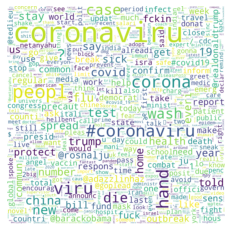

In [95]:
# edit wordcloud image
wordcloud_march4freq = WordCloud(max_words=1000,
                             width = 2000,
                             height = 2000,
                             background_color="white").generate_from_frequencies(frequencies = fdist)
plt.figure()
plt.imshow(wordcloud_march4freq, interpolation="bilinear")
plt.axis("off")

In [97]:
# save to file
# save word cloud to image
wordcloud_wordfreq.to_file("covid19-wordcloud-march4-word-frequency.png")

## April 1, 2020 Tweet Analysis

### Parsing Out Individual Words (Tokenizing)

### Make all text lowerase 

In [98]:
# make column of lowercase text
df_en_april1["lcase_text"] = df_en_april1["text"].str.lower()

<ipython-input-98-dcaff2f508d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_april1["lcase_text"] = df_en_april1["text"].str.lower()


### Tokenizing Text

In [99]:
# make new column that tokenizes the tweet text
df_en_april1["tokenized_text"] = df_en_april1["lcase_text"].apply(word_tokenize)

<ipython-input-99-1075334e0fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_april1["tokenized_text"] = df_en_april1["lcase_text"].apply(word_tokenize)


In [100]:
# edit dataframe to only include tweet id, tweet text and tokenized text columns
df_april1_filter = df_en_april1.filter(items = ["id","lcase_text", "tokenized_text"]).reset_index()

In [101]:
# delete the index column since we don't need this information
del df_april1_filter["index"]

In [102]:
# preview data
df_april1_filter.head()

,id,lcase_text,tokenized_text
0,1245381532669423616,rt @ebonyvixen27: fucking corona virus is real...,"[rt, @, ebonyvixen27, :, fucking, corona, viru..."
1,1245381532283547650,"rt @dramadhikari: 386 new covid-19 cases, 132 ...","[rt, @, dramadhikari, :, 386, new, covid-19, c..."
2,1245381532132552704,"rt @realcandaceo: we’ve gone from 2 million, t...","[rt, @, realcandaceo, :, we, ’, ve, gone, from..."
3,1245381535295045632,rt @oof_juice: y'all cant stay home for 30 day...,"[rt, @, oof_juice, :, y'all, cant, stay, home,..."
4,1245381532199649283,rt @drizzyjeri: religion waiting for science t...,"[rt, @, drizzyjeri, :, religion, waiting, for,..."


In [103]:
# make column of tokenized twitter data
# keeps @mentions together and #hastags together, etc.
df_april1_filter["tweet_tokens"] = df_april1_filter["lcase_text"].apply(tweet_tokenizer.tokenize)

### Removing English Filler Words (Stop Words) 

In [104]:
# remove stop words from tokenized tweet words
df_april1_filter["no_stopwords"] = df_april1_filter["tweet_tokens"].apply(lambda ttweet:[word for word in ttweet if word not in stop_words])

## Word Normalizing 

### Combine Similar Words (Stemming) 

In [105]:
# make new coludf_march4_filterf stemmed words in dataframe
df_april1_filter["stem_words"] = df_april1_filter["no_stopwords"].apply(lambda sublist : [ps.stem(word) for word in sublist])

## Quantitative Text Analysis

In [107]:
# create a list of all of the tokenized, non stopword words
word_col_list_apr1 = df_april1_filter["stem_words"].tolist()

In [108]:
# make emptly list
word_list_apr1 = []

#flatten the list
for sublist in word_col_list_apr1:
    for word in sublist:
        word_list_apr1.append(word)

In [109]:
# look at the frequency of each word to see what people were talking most about in this hour
# get frequency of words
fdist_apr1 = FreqDist(word_list_apr1)

In [110]:
# turn frequency into a dataframe
df_freq_apr1 = pd.DataFrame(fdist_apr1.items(), columns=['word', 'frequency'])

In [111]:
# sort words by most frequent-least frequent
df_freq_apr1 = df_freq_apr1.sort_values(by = "frequency", ascending = False).reset_index()

In [113]:
# delete index column
del df_freq_apr1["index"]

In [114]:
# preview data
df_freq_apr1.head(20)

,word,frequency
0,coronaviru,4690
1,covid,4333
2,19,3634
3,?,3537
4,peopl,2488
5,china,2425
6,pandem,2339
7,trump,2127
8,case,1812
9,us,1791


## Frequency Word Cloud 

(-0.5, 1999.5, 1999.5, -0.5)

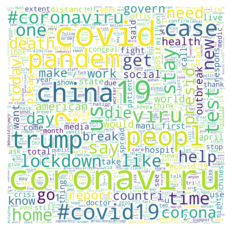

In [115]:
# edit wordcloud image
wordcloud_april1freq = WordCloud(max_words=1000,
                             width = 2000,
                             height = 2000,
                             background_color="white").generate_from_frequencies(frequencies = fdist_apr1)
plt.figure()
plt.imshow(wordcloud_april1freq, interpolation="bilinear")
plt.axis("off")

In [117]:
# save to file
# save word cloud to image
wordcloud_april1freq.to_file("covid19-wordcloud-april1-word-frequency.png")